In [9]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries
from vadetisweb.anomaly_algorithms.detection.correleation.distance import get_df_corr_geo_distance
from vadetisweb.anomaly_algorithms.detection.correleation.pearson import pearson, dtw_pearson

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [11]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    if ts_name is not None:
        ts_id = dataset.timeseries_set.all().filter(name=ts_name).first().id

    return dataset, training_dataset, ts_id

In [12]:
def lisa_pearson_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o pearson(df, time_series_id, window_size=window_size)
    return result

In [13]:
def lisa_dtw_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function='euclidean')
    return result

In [14]:
def lisa_geo_time_it(df, df_class, time_series_id, maximize_score='F1-Score'):
    result = %timeit -o get_df_corr_geo_distance(df)
    return result

In [15]:
# Temp1 Single - TS LENGTH
dataset_name = 'Idaweb Swiss Temperature TS14'
ts_name = 'REH'
dimensions = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [16]:
# TIME TS LENGTH - Pearson
dataset, _, ts_id = get_dataset(dataset_name, ts_name)
lisa_pearson_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = lisa_pearson_time_it(df, df_class, ts_id)
    lisa_pearson_results.append(np.round(np.average(r.all_runs), 2))

88.3 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
87.6 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
89 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
90.1 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.3 ms ± 3.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
92.8 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
93.9 ms ± 3.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
89.7 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
88.7 ms ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
90.1 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
# TIME TS LENGTH - DTW
dataset, _, ts_id = get_dataset(dataset_name, ts_name)
lisa_dtw_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = lisa_dtw_time_it(df, df_class, ts_id)
    lisa_dtw_results.append(np.round(np.average(r.all_runs), 2))

1.98 s ± 52.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.05 s ± 68.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.18 s ± 95.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.27 s ± 72.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.2 s ± 161 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.2 s ± 81.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.39 s ± 133 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.82 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.8 s ± 226 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.8 s ± 172 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# TIME TS LENGTH - LISA VANILLA
dataset, _, ts_id = get_dataset(dataset_name, ts_name)
lisa_geo_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = lisa_geo_time_it(df, df_class, ts_id)
    lisa_geo_results.append(np.round(np.average(r.all_runs), 2))

424 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
422 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
424 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
420 ms ± 9.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
418 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
422 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
422 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
426 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
423 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
412 ms ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_geo_results }, 
         ]

In [19]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': [0.88, 0.88, 0.89, 0.9, 0.91, 0.93, 0.94, 0.9, 0.89, 0.9]}, {'title': 'LISA (Vanilla)', 'scores': [0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.43, 0.42, 0.41]}]


In [3]:
import numpy as np
old_scores = [{'title': 'LISA (Pearson)', 'scores': [1.27, 1.46, 1.59, 1.69, 1.85, 2.03, 2.17, 2.34, 2.49, 2.64]}, {'title': 'LISA (DTW)', 'scores': [1.72, 2.43, 3.04, 3.79, 4.45, 5.13, 5.68, 6.34, 7.1, 7.75]}, {'title': 'LISA (Vanilla)', 'scores': [1.35, 1.52, 1.71, 1.87, 2.01, 2.23, 2.39, 2.51, 2.69, 2.93]}, {'title': 'RPCA', 'scores': [2.41, 2.51, 2.48, 2.45, 2.55, 2.58, 2.64, 2.65, 2.71, 2.75]}, {'title': 'Histogram', 'scores': [2.32, 2.37, 2.39, 2.43, 2.49, 2.46, 2.58, 2.61, 2.68, 2.59]}, {'title': 'Cluster', 'scores': [2.35, 2.41, 2.53, 2.46, 2.57, 2.58, 2.63, 2.64, 2.73, 2.71]}, {'title': 'SVM', 'scores': [2.25, 2.32, 2.38, 2.44, 2.47, 2.53, 2.53, 2.61, 2.59, 2.59]}, {'title': 'Isolation Forest', 'scores': [2.63, 2.67, 2.73, 2.74, 2.75, 2.81, 2.86, 2.93, 2.93, 2.95]}]
scores = [{'title': 'LISA (Pearson)', 'scores': [1.3, 1.48, 1.64, 1.72, 1.97, 2.08, 2.31, 2.43, 2.6, 2.86]}, {'title': 'LISA (DTW)', 'scores': [1.98, 3.05, 4.18, 5.27, 6.2, 7.2, 8.39, 9.82, 10.79, 11.77]}, {'title': 'LISA (Vanilla)', 'scores': [1.65, 1.82, 2.0, 2.17, 2.37, 2.53, 2.73, 2.92, 3.05, 3.23]}, {'title': 'RPCA', 'scores': [2.37, 2.58, 2.5, 2.54, 2.51, 2.62, 2.64, 2.66, 2.7, 2.78]}, {'title': 'Histogram', 'scores': [2.41, 2.46, 2.49, 2.58, 2.56, 2.63, 2.68, 2.67, 2.69, 2.7]}, {'title': 'Cluster', 'scores': [2.52, 2.56, 2.62, 2.76, 2.8, 2.77, 2.73, 2.74, 2.78, 2.84]}, {'title': 'SVM', 'scores': [2.39, 2.37, 2.43, 2.39, 2.41, 2.58, 2.55, 2.6, 2.66, 2.75]}, {'title': 'Isolation Forest', 'scores': [2.66, 2.71, 2.77, 2.75, 2.84, 2.9, 2.94, 2.94, 3.0, 3.03]}]


In [77]:
import matplotlib.ticker as ticker
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, marker=".", label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Length of TS')
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.LogFormatter(base=10, labelOnlyBase=True))
    #ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation(base=10, labelOnlyBase=True))
    #ax.yaxis.set_minor_formatter(formatter)
    ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%d "))
    #ax.yaxis.set_minor_formatter(ticker.LogFormatterSciNotation(base=10, labelOnlyBase=True))
    #ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 100))

    fig.tight_layout()
    plt.show()

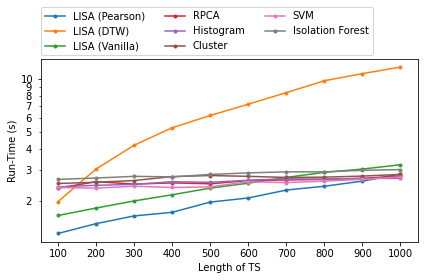

In [78]:
generate_timeit_line_chart(dimensions, scores)

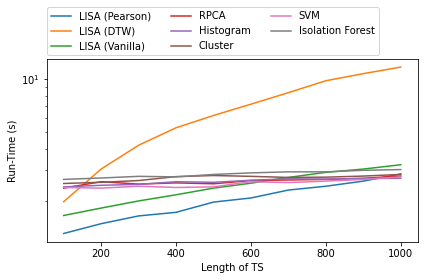

In [45]:
generate_timeit_line_chart(dimensions, scores)

In [3]:
dimension = np.array([200, 400, 600, 800, 1000])

lisa_pearson_results = np.array([1.42, 1.68, 2.01, 2.37, 2.73])
lisa_dtw_results = np.array([2.35, 3.7, 5.08, 6.37, 7.65])
lisa_spatial_results = np.array([1.54, 1.86, 2.21, 2.52, 2.88])

rpca_results = np.array([2.43, 2.5, 2.67, 2.64, 2.75])
histogram_results = np.array([2.35, 2.39, 2.48, 2.56, 2.7])
cluster_results = np.array([2.44, 2.48, 2.48, 2.66, 2.7])
svm_results = np.array([2.25, 2.34, 2.45, 2.48, 2.64])
isolation_results = np.array([2.65, 2.71, 2.79, 2.86, 2.94])

scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [4]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Length of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

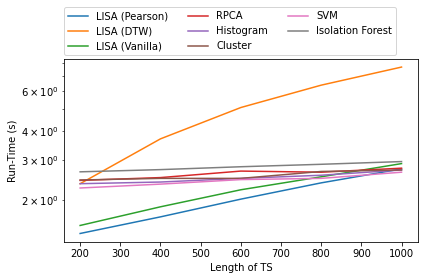

In [5]:
#PLOT
generate_timeit_line_chart(dimension, scores)
